In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from IPython.display import display
import matplotlib.ticker as ticker

In [ ]:
df1=pd.read_csv(r"C:\Users\masoo\Downloads\HackerEarth ML\Dataset\Train.csv")
pd.options.display.max_columns = None
df1.head(2)

In [ ]:
df1.columns

In [ ]:
df1.Pay_Scale.value_counts()

In [ ]:
df3=df1[df1.Attrition_rate<=0.3]
df3

In [ ]:
df3.isnull().sum()

In [ ]:
df4=df3.dropna()
df4.isnull().sum()

In [ ]:
df4.head(2)

In [ ]:
df_gender=pd.DataFrame(df4.Gender.unique(),columns=["Gender"])
df_gender["Gender_category"]=np.arange(0,2)
df_gender

In [ ]:
#print(df7.Relationship_Status.value_counts())

df_relation=pd.DataFrame(df4.Relationship_Status.unique(),columns=["Relationship_Status"])
df_relation["relationship_category"]=np.arange(0,2)
df_relation

In [ ]:
#print(df5.Hometown.value_counts())

df_hometown=pd.DataFrame(df4.Hometown.unique(),columns=["Hometown"])
df_hometown["Hometown_category"]=np.arange(0,5)
df_hometown

In [ ]:
df_Unit=pd.DataFrame(df4.Unit.unique(),columns=["Unit"])
df_Unit["Unit_cateogy"]=np.arange(0,12)
df_Unit

In [ ]:
#df7.Decision_skill_possess.value_counts()

df_decisionskill=pd.DataFrame(df4.Decision_skill_possess.unique(),columns=["Decision_skill_possess"])
df_decisionskill["Decision_skill_category"]=np.arange(0,4)
df_decisionskill

In [ ]:
#df5.Compensation_and_Benefits.value_counts()

df_compensation=pd.DataFrame(df4.Compensation_and_Benefits.unique(),columns=["Compensation_and_Benefits"])
df_compensation["compensation_category"]=np.arange(0,5)
df_compensation

In [ ]:
df6=df4.copy()

In [ ]:
df6=df6.merge(df_gender,how="outer",left_on=["Gender"],right_on=["Gender"])
df6=df6.merge(df_relation,how="outer",left_on=["Relationship_Status"],right_on=["Relationship_Status"])
df6=df6.merge(df_hometown,how="outer",left_on=["Hometown"],right_on=["Hometown"])
df6=df6.merge(df_Unit,how="outer",left_on=["Unit"],right_on=["Unit"])
df6=df6.merge(df_decisionskill,how="outer",left_on=["Decision_skill_possess"],right_on=["Decision_skill_possess"])
df6=df6.merge(df_compensation,how="outer",left_on=["Compensation_and_Benefits"],right_on=["Compensation_and_Benefits"])
df6.head(5)

In [ ]:
df6.columns

In [ ]:
df7=df6.drop(['Employee_ID', 'Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits'],axis=1)
df7.head(3)

In [ ]:
X=df7.drop(['Attrition_rate'],axis=1)
y=df7.Attrition_rate

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=101)
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
from sklearn.linear_model import LinearRegression

lr10=LinearRegression()

In [ ]:
lr10.fit(X_train,y_train)

In [ ]:
predictions1=lr10.predict(X_test)
predictions1

In [ ]:
print(lr10.intercept_)

In [ ]:
cdf = pd.DataFrame(lr10.coef_,X.columns,columns=['Coefficient'])
cdf

In [32]:
lr10.score(X_test,y_test)

-0.008082323040170758

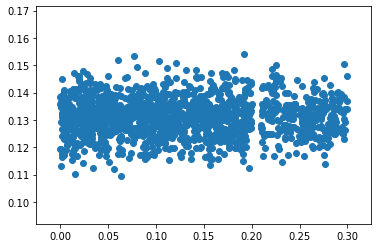

In [33]:
plt.scatter(y_test,predictions1)

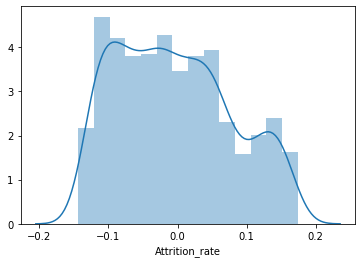

In [34]:
sns.distplot((y_test-predictions1))

In [35]:
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,predictions1)
a

0.07011452299340644

In [36]:
b=metrics.mean_squared_error(y_test,predictions1)
b

0.006844195135220737

In [37]:
c=np.sqrt(b)
c

0.08272965088298595

In [38]:
dft1=pd.read_csv(r"C:\Users\masoo\Downloads\HackerEarth ML\Dataset\Test.csv")
dft1

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [39]:
dft1.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [40]:
dft_gender=pd.DataFrame(dft1.Gender.unique(),columns=["Gender"])
dft_gender["Gender_category"]=np.arange(0,2)
dft_gender
dft1.Education_Level.value_counts()
dft_relation=pd.DataFrame(dft1.Relationship_Status.unique(),columns=["Relationship_Status"])
dft_relation["relationship_category"]=np.arange(0,2)
dft_relation
dft_hometown=pd.DataFrame(dft1.Hometown.unique(),columns=["Hometown"])
dft_hometown["Hometown_category"]=np.arange(0,5)
dft_hometown
dft_Unit=pd.DataFrame(dft1.Unit.unique(),columns=["Unit"])
dft_Unit["Unit_cateogy"]=np.arange(0,12)
dft_Unit
dft_decisionskill=pd.DataFrame(dft1.Decision_skill_possess.unique(),columns=["Decision_skill_possess"])
dft_decisionskill["Decision_skill_category"]=np.arange(0,4)
dft_decisionskill
dft_compensation=pd.DataFrame(dft1.Compensation_and_Benefits.unique(),columns=["Compensation_and_Benefits"])
dft_compensation["compensation_category"]=np.arange(0,5)
dft_compensation

,Compensation_and_Benefits,compensation_category
0,type2,0
1,type3,1
2,type0,2
3,type4,3
4,type1,4


In [42]:
dft2=dft1.copy()
dft2.fillna(0,inplace=True)
dft2

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,EID_10066,F,0.0,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,0.0,4,8,4
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [43]:
dft2.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [44]:
dft2=dft2.merge(dft_gender,how="outer",left_on=["Gender"],right_on=["Gender"])
dft2=dft2.merge(dft_relation,how="outer",left_on=["Relationship_Status"],right_on=["Relationship_Status"])
dft2=dft2.merge(dft_hometown,how="outer",left_on=["Hometown"],right_on=["Hometown"])
dft2=dft2.merge(dft_Unit,how="outer",left_on=["Unit"],right_on=["Unit"])
dft2=dft2.merge(dft_decisionskill,how="outer",left_on=["Decision_skill_possess"],right_on=["Decision_skill_possess"])
dft2=dft2.merge(dft_compensation,how="outer",left_on=["Compensation_and_Benefits"],right_on=["Compensation_and_Benefits"])
dft2.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_category,relationship_category,Hometown_category,Unit_cateogy,Decision_skill_category,compensation_category
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,0,0,0,0,0
1,EID_8682,F,0.0,4,Single,Springfield,R&D,Conceptual,32.0,4,32,1,2,4.0,type2,3.0,3,0.7516,-2.7762,3.0,2,9,3,0,0,0,0,0,0
2,EID_8106,M,40.0,3,Single,Springfield,R&D,Conceptual,12.0,2,74,2,2,9.0,type2,2.0,2,-0.9612,0.7075,2.0,2,9,3,1,0,0,0,0,0
3,EID_14031,F,30.0,3,Married,Springfield,R&D,Conceptual,7.0,4,50,0,4,3.0,type2,3.0,4,0.0000,-0.4537,2.0,3,8,5,0,1,0,0,0,0
4,EID_12009,F,34.0,4,Married,Springfield,R&D,Conceptual,8.0,4,40,1,3,6.0,type2,3.0,3,-0.9612,0.7075,2.0,4,7,3,0,1,0,0,0,0


In [45]:
dft3=dft2.drop(['Employee_ID', 'Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits'],axis=1)
dft3

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_category,relationship_category,Hometown_category,Unit_cateogy,Decision_skill_category,compensation_category
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,0,0,0,0,0
1,0.0,4,32.0,4,32,1,2,4.0,3.0,3,0.7516,-2.7762,3.0,2,9,3,0,0,0,0,0,0
2,40.0,3,12.0,2,74,2,2,9.0,2.0,2,-0.9612,0.7075,2.0,2,9,3,1,0,0,0,0,0
3,30.0,3,7.0,4,50,0,4,3.0,3.0,4,0.0000,-0.4537,2.0,3,8,5,0,1,0,0,0,0
4,34.0,4,8.0,4,40,1,3,6.0,3.0,3,-0.9612,0.7075,2.0,4,7,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24.0,2,5.0,4,36,1,5,3.0,1.0,1,-0.9612,-0.4537,2.0,3,7,2,1,1,0,3,2,3
2996,30.0,4,7.0,2,33,2,4,8.0,1.0,3,0.7516,-0.4537,1.0,3,8,3,1,1,1,3,2,3
2997,30.0,3,8.0,1,40,1,4,7.0,1.0,3,0.7516,-1.6150,3.0,2,8,3,1,0,1,10,2,3
2998,46.0,1,15.0,2,55,2,3,7.0,3.0,3,0.7516,-0.4537,2.0,2,9,3,1,1,1,10,2,3


In [46]:
X_test1=dft3.copy()

In [47]:
predictionsTest=lr10.predict(X_test1)
len(predictionsTest)

3000

In [48]:
s=pd.Series(predictionsTest)
s

0       0.144601
1       0.112516
2       0.145452
3       0.132745
4       0.139926
          ...   
2995    0.137722
2996    0.135231
2997    0.124475
2998    0.127649
2999    0.128332
Length: 3000, dtype: float64

In [49]:
df_pred=pd.DataFrame(s)
df_pred["n1"]=np.arange(0,3000)
df_pred

,0,n1
0,0.144601,0
1,0.112516,1
2,0.145452,2
3,0.132745,3
4,0.139926,4
...,...,...
2995,0.137722,2995
2996,0.135231,2996
2997,0.124475,2997
2998,0.127649,2998


In [50]:
df_emp=pd.DataFrame(dft2.Employee_ID)
df_emp["n2"]=np.arange(0,3000)
df_emp

,Employee_ID,n2
0,EID_22713,0
1,EID_8682,1
2,EID_8106,2
3,EID_14031,3
4,EID_12009,4
...,...,...
2995,EID_16439,2995
2996,EID_14984,2996
2997,EID_22525,2997
2998,EID_7336,2998


In [51]:
df_emp=df_emp.merge(df_pred,how="inner",left_on="n2",right_on="n1")
df_emp

,Employee_ID,n2,0,n1
0,EID_22713,0,0.144601,0
1,EID_8682,1,0.112516,1
2,EID_8106,2,0.145452,2
3,EID_14031,3,0.132745,3
4,EID_12009,4,0.139926,4
...,...,...,...,...
2995,EID_16439,2995,0.137722,2995
2996,EID_14984,2996,0.135231,2996
2997,EID_22525,2997,0.124475,2997
2998,EID_7336,2998,0.127649,2998


In [52]:
df_predictions=df_emp.drop(["n2","n1"],axis=1)
df_predictions

,Employee_ID,0
0,EID_22713,0.144601
1,EID_8682,0.112516
2,EID_8106,0.145452
3,EID_14031,0.132745
4,EID_12009,0.139926
...,...,...
2995,EID_16439,0.137722
2996,EID_14984,0.135231
2997,EID_22525,0.124475
2998,EID_7336,0.127649


In [53]:
df_predictions.to_csv(r"C:\Users\masoo\Downloads\HackerEarth ML\Dataset\Predictions.csv",index=False)